### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Elimina del dataframe todas las filas que se correspondan con la clase valor "1".

Ahora, realiza el ejercicio con el nuevo dataframe:

- ¿Se mejora la precisión del algoritmo con dos clases? ¿por qué?

LogisticRegression() es una clase que tiene varios parámetros de entrada. Investiga (modifica, prueba) los argumentos y comenta si modificando algunas de ellas se mejora el porcentaje de acierto del problema.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score #pasar esta a houses
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
dataframe = dataframe.set_index(['clase'])

In [4]:
dataframe = dataframe.drop(1)


In [5]:
dataframe

,duracion,paginas,acciones,valor
clase,,,,
2,7.0,2,4,8
2,21.0,2,6,6
2,57.0,2,4,4
2,101.0,3,6,12
2,109.0,2,6,12
...,...,...,...,...
0,13.0,1,7,42
0,12.0,1,2,6
0,13.0,1,3,9


In [6]:
print(dataframe.groupby('clase').size())

clase
0    86
2    44
dtype: int64


In [7]:
dataframe.reset_index(inplace= True)

In [8]:
dataframe

,clase,duracion,paginas,acciones,valor
0,2,7.0,2,4,8
1,2,21.0,2,6,6
2,2,57.0,2,4,4
3,2,101.0,3,6,12
4,2,109.0,2,6,12
...,...,...,...,...,...
125,0,13.0,1,7,42
126,0,12.0,1,2,6
127,0,13.0,1,3,9
128,0,13.0,1,7,28


In [9]:
dataframe.describe()

,clase,duracion,paginas,acciones,valor
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,0.676923,97.180708,2.069231,9.053846,30.769231
std,0.950034,198.611241,1.629136,10.098976,47.961150
min,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,11.000000,1.000000,3.000000,6.000000
50%,0.000000,12.000000,1.000000,6.000000,15.000000
75%,2.000000,65.250000,2.000000,12.000000,35.000000
max,2.000000,898.000000,9.000000,63.000000,378.000000


In [10]:
print(dataframe.groupby('clase').size())

clase
0    86
2    44
dtype: int64


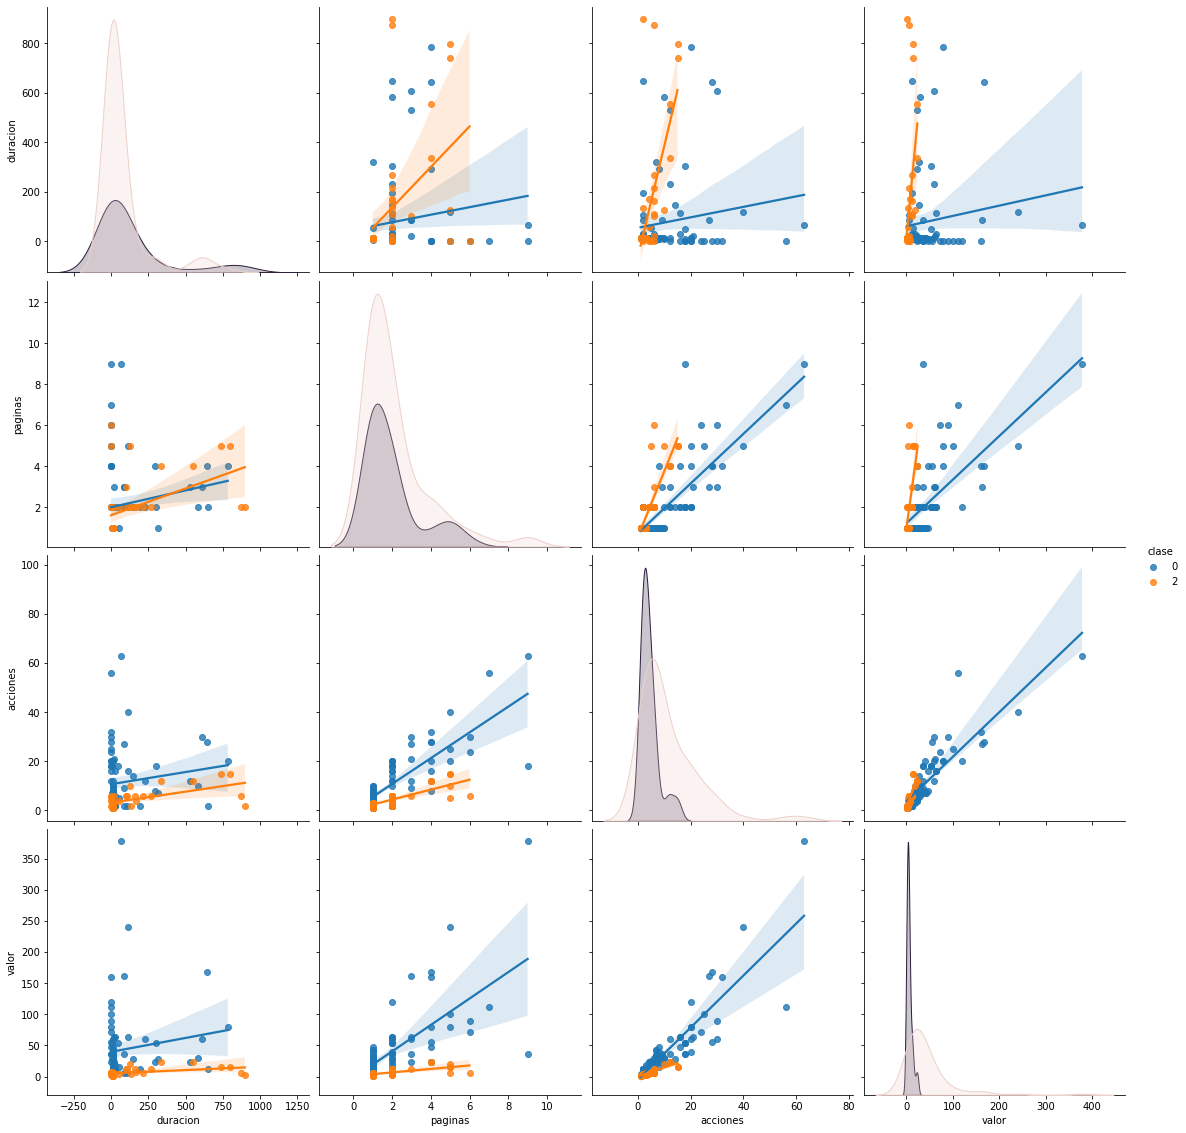

In [12]:
sns.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

In [13]:
X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])
X.shape

(130, 4)

In [15]:
X = np.array(dataframe.drop(['clase'], 1))
y = np.array(dataframe['clase'])
X.shape

(130, 4)

In [14]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [20]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [16]:
model.score(X,y)

0.9538461538461539

In [17]:
validation_size = 0.20
seed = 7 # nuemrp de volitas que saco

X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [18]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg)

[1.         0.90909091 0.90909091 0.90909091 1.         0.8
 1.         1.         0.9        0.8       ]
Logistic Regression: 0.922727 (0.074218)


In [22]:
model.score(X_val, Y_val)

0.9615384615384616